# In which we align our SplineyTrajectory to our baseline trajectories

Approximately

In [1]:
from thesis.Trajectory import CircleTrajectory, BowtieTrajectory, SimpleLadderTrajectory
from thesis.trajectory.SplineyTrajectory import SplineyTrajectory
from thesis.Flight import Flight
from thesis.ThesisCraft import craft
from math import pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


trajectories = {
  'circle': CircleTrajectory((0, 0, 1000), 1985.8),
  'bowtie': BowtieTrajectory((0, 0, 1000), lobeRadius = 500, lobeCenterDistance = 1485.2),
  'ladder': SimpleLadderTrajectory(
    (0, 0, 1000),
    lobeRadius = 500,
    lobeCenterDistance = 1464.84,
    stepHeight=70,
    nSteps=41,
    nStepsDown=70
  )
}

times = pd.date_range(start = pd.to_datetime('2020-11-29T08'), end = pd.to_datetime('2020-11-30T08'), freq='20S', tz='America/Detroit').to_series()

# UGH recalibration
Flight(craft, trajectories['ladder'], [5 for p in trajectories['ladder'].pieces]).cycleTime

Mass is 85.85 kg (50.16 kg struct, 15.50 kg bat)


86400.1240693597

1982.8100000058519

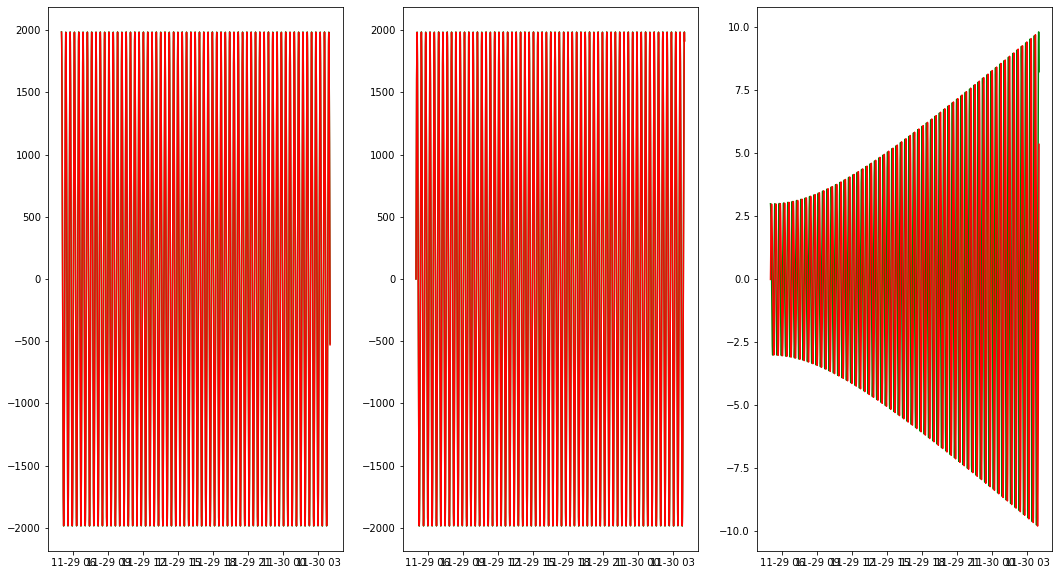

In [25]:
times = pd.date_range(start = pd.to_datetime('2020-11-29T00'), end = pd.to_datetime('2020-11-29T23'), freq='20S', tz='America/Detroit').to_series()

baseline = trajectories['circle']
# X Y Z heading a1 a2
r = 1982.8
pieces = [
  [r, 0, 1000, pi/2, 5, 5],
  [-r, 0.01, 1000, -pi/2, 5, 5], # |dy| > 0 for our math to work, hence the 0.01
  [r, 0, 1000, pi/2, 5, 5],
]
spline = SplineyTrajectory(pieces)

#(baseline.render() + spline.render(color='red')).show()

baselineFlight = Flight(craft, baseline, [5 for piece in baseline.pieces])
splineFlight = Flight(craft, spline, spline.alphas)

baselinePoses = baselineFlight.toPoses(times)
splinePoses = splineFlight.toPoses(times)

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
ax[0].plot(baselinePoses.x, color='green')
ax[0].plot(splinePoses.x, color='red')

ax[1].plot(baselinePoses.y, color='green')
ax[1].plot(splinePoses.y, color='red')

ax[2].plot(baselinePoses.x - splinePoses.x, color='green')
ax[2].plot(baselinePoses.y - splinePoses.y, color='red')

baselineFlight.cycleTime, splineFlight.cycleTime

# Off by ~3 meters max, good enough

np.sqrt(splinePoses.x**2+splinePoses.y**2).max()

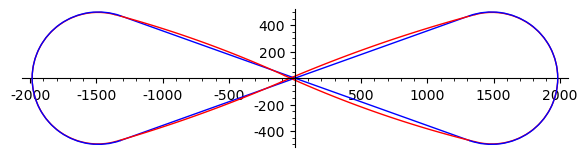

(1004.65756940337, 1004.6572946251755)

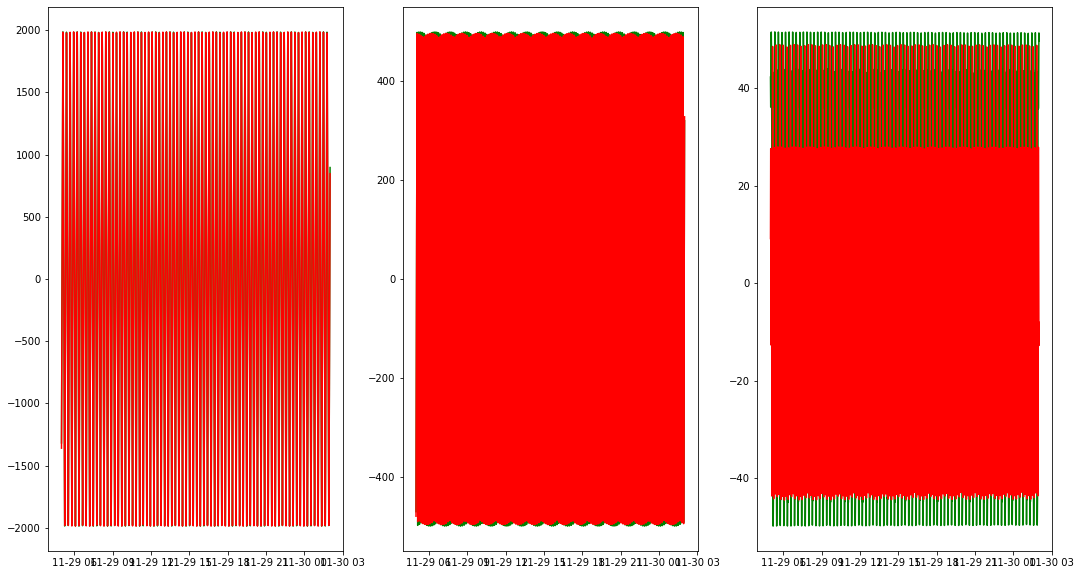

In [27]:
times = pd.date_range(start = pd.to_datetime('2020-11-29T00'), end = pd.to_datetime('2020-11-29T21'), freq='20S', tz='America/Detroit').to_series()

baseline = trajectories['bowtie']
# X Y Z heading a1 a2
rOutr = 480
rCntr = 1359.2
dt=0.2625
pieces = [
  [-rCntr, -rOutr, 1000, dt, 5, 5],
  [rCntr, rOutr, 1000, dt, 5, 5],
  [rCntr+0.01, -rOutr, 1000, pi-dt, 5, 5],
  [-rCntr, rOutr, 1000, pi-dt, 5, 5],
  [-rCntr+0.01, -rOutr, 1000, dt, 5, 5],
]
spline = SplineyTrajectory(pieces, craft=craft)

(baseline.renderTop() + spline.renderTop(color='red')).show()

baselineFlight = Flight(craft, baseline, [5 for piece in baseline.pieces])
splineFlight = Flight(craft, spline, spline.alphas)

baselinePoses = baselineFlight.toPoses(times)
splinePoses = splineFlight.toPoses(times)

fig, ax = plt.subplots(1, 3, figsize=(18, 10))
ax[0].plot(baselinePoses.x, color='green')
ax[0].plot(splinePoses.x, color='red')

ax[1].plot(baselinePoses.y, color='green')
ax[1].plot(splinePoses.y, color='red')

ax[2].plot(baselinePoses.x - splinePoses.x, color='green')
ax[2].plot(baselinePoses.y - splinePoses.y, color='red')

baselineFlight.cycleTime, splineFlight.cycleTime

# Off by ~40 meters max, good enough

(86400.1240693597, 95239.76613786131)

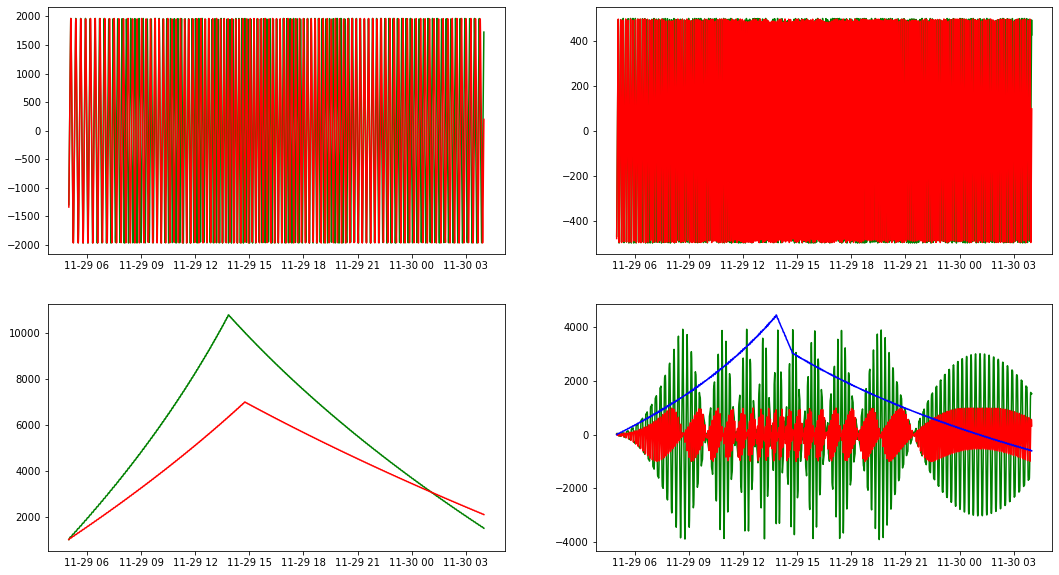

In [32]:
times = pd.date_range(start = pd.to_datetime('2020-11-29T00'), end = pd.to_datetime('2020-11-29T23'), freq='20S', tz='America/Detroit').to_series()

baseline = trajectories['ladder']
# X Y Z heading a1 a2
rOutr = 479.9
rCntr = 1335
dt=0.2675

stepDownHeight=6000/70/2
nSteps=41
nStepsDown=70
stepHeight = stepDownHeight * nStepsDown / nSteps

pieces = []

for i in range(2*nSteps):
  if i % 2 == 0:
    pieces.extend([
      [-rCntr+0.01, -rOutr, 1000 + i * stepHeight, dt, 5, 5],
      [rCntr, rOutr, 1000 + (i + 1) * stepHeight, dt, 5, 5],
    ])
  else:
    pieces.extend([
      [rCntr+0.01, -rOutr, 1000 + i * stepHeight, pi-dt, 5, 5],
      [-rCntr, rOutr, 1000 + (i + 1) * stepHeight, pi-dt, 5, 5],
    ])
    
altMax = 2 * nSteps * stepHeight + 1000
    
for i in range(2*nStepsDown):
  if i % 2 == 0:
    pieces.extend([
      [-rCntr+0.01, -rOutr, altMax - i * stepDownHeight, dt, 5, 5],
      [rCntr, rOutr, altMax - (i+1) * stepDownHeight, dt, 5, 5],
    ])
  else:
    pieces.extend([
      [rCntr+0.01, -rOutr, altMax - i * stepDownHeight, pi-dt, 5, 5],
      [-rCntr, rOutr, altMax - (i+1) * stepDownHeight, pi-dt, 5, 5],
    ])
    
pieces.append(pieces[0])

spline = SplineyTrajectory(pieces, craft=craft)

# (baseline.renderTop() + spline.renderTop(color='red')).show()
# (baseline.renderSide() + spline.renderSide(color='red')).show()

baselineFlight = Flight(craft, baseline, [5 for piece in baseline.pieces])
splineFlight = Flight(craft, spline, spline.alphas)

baselinePoses = baselineFlight.toPoses(times)
splinePoses = splineFlight.toPoses(times)

fig, ax = plt.subplots(2, 2, figsize=(18, 10))
ax[0,0].plot(baselinePoses.x, color='green')
ax[0,0].plot(splinePoses.x, color='red')

ax[0,1].plot(baselinePoses.y, color='green')
ax[0,1].plot(splinePoses.y, color='red')

ax[1,0].plot(baselinePoses.z, color='green')
ax[1,0].plot(splinePoses.z, color='red')

ax[1,1].plot(baselinePoses.x - splinePoses.x, color='green')
ax[1,1].plot(baselinePoses.y - splinePoses.y, color='red')
ax[1,1].plot(baselinePoses.z - splinePoses.z, color='blue')
#ax[1,1].plot(baselinePoses.z - splinePoses.z, color='blue')

baselineFlight.cycleTime, splineFlight.cycleTime

# Off by ~50 meters max, good enough

In [34]:
from thesis.EvalHelper import Judge
from thesis.Scenario import Scenario

scene = Scenario()
import random
random.seed(0)
#scene.addRandomGroundUsersUniformCircular(5, r = 5000)
for x in range(-2000, 2001, 500):
    for y in range(-2000, 2001, 500):
        if random.random() < 0.25:
          scene.addUser(vector((x, y, 0)))

judge = Judge(scene, craft)
#del sys.modules['thesis.optimize.functions']
from thesis.optimize.functions import (
  SplineyFitnessHelper, batteryReward, throughputReward, throughputPenalty,
  energyPenalty, gravityReward, radiusPenalty, altitudePenalty, energyPenalty
)
times = pd.date_range(start = pd.to_datetime('2020-11-29T09'), end = pd.to_datetime('2020-11-30T09'), freq='20S', tz='America/Detroit').to_series()

helper = SplineyFitnessHelper(judge, craft, times, expr = [
  #batteryReward(),
  #gravityReward() * 0.5L,
  radiusPenalty(2000) * float(1e-6),
  altitudePenalty(1000, 12000),
  throughputReward() / 1e6L / len(scene.users),
  energyPenalty(0, gravityCoeff = 0)
])

vec = [ i for f in pieces for i in f]
print(helper.getFitness(debug=True)(vec), helper.getFitness(debug=False)(vec))
spline.render().show()
#vec

((((RP<-0.0>*1e-06)+AP<-0.0>)+((TR<242417000.87307033>/1000000.0)/11))+EP<0>) 22.03790917027912


Graphics3d Object

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[1982.80000000000,
 0,
 1000,
 1.5707963267948966,
 5,
 5,
 -1982.80000000000,
 0.0100000000000000,
 1000,
 -1.5707963267948966,
 5,
 5,
 1982.80000000000,
 0,
 1000,
 1.5707963267948966,
 5,
 5]

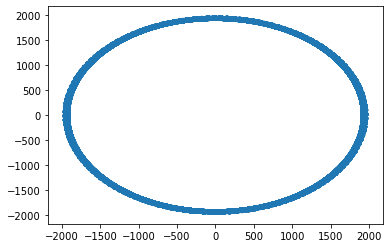

In [18]:
traj, alphas = helper.getTrajBuilder()(vec)
poses = judge.flightStats(Flight(craft, traj, alphas))['poses']
plt.plot(poses.x, poses.y)
traj.renderTop()
vec
#traj.renderTop()